In [354]:
import imagen as ig
import holoviews as hv
from PIL import Image, ImageFilter

%load_ext holoviews.ipython
%opts Layout [vertical_spacing=0.0 horizontal_spacing=0.0] Image [show_xaxis=None show_yaxis=None show_frame=False show_title=False padding=0]

t holoviews.ipython


ia param namespace 


:Image   [x,y]   (z)
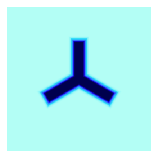

In [362]:
rect = ig.Rectangle()
ig.Asterisk(x=-0.1, y=-0.1)[:]

ia param namespace 


:Image   [x,y]   (z)
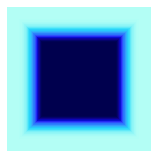

In [352]:
rect[:]

In [ ]:
raw_rect = ig.RawRectangle()

In [319]:
hv.save(rect[:], 'rect.png')
hv.save(raw_rect[:], 'raw_rect.png')

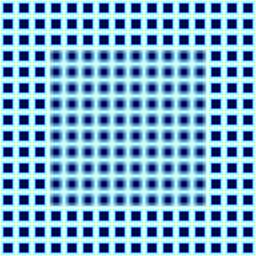

In [326]:
pat = Image.open('rect.png')
ill = illusion(pat)
ill.save('illusion_image/blur/1.png')
ill

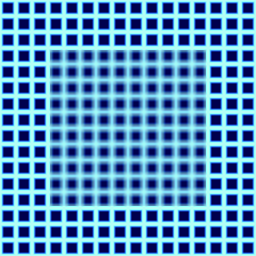

In [327]:
pat = Image.open('rect.png')
bh, bw = 16, 16
pat = pat.resize((bh, bw))
pat = pat.crop((1,1,bh-1,bw-1))
ill = illusion(pat)
ill.save('illusion_image/blur/2.png')
ill

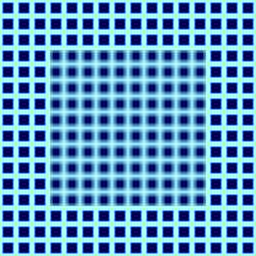

In [328]:
pat = Image.open('rect.png')
bh, bw = 100, 100
pat = pat.resize((bh, bw))
pat = pat.crop((5,5,bh-5,bw-5))
bh, bw = 16, 16
pat = pat.resize((bh, bw))
ill = illusion(pat)
ill.save('illusion_image/blur/3.png')
ill

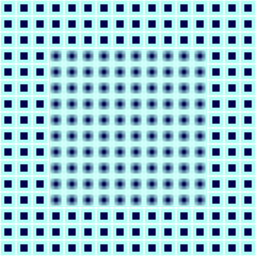

In [329]:
pat = Image.open('raw_rect.png')
ill = illusion(pat)
ill.save('illusion_image/blur/4.png')
ill

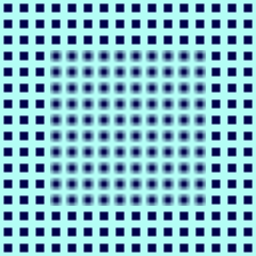

In [330]:
pat = Image.open('raw_rect.png')
bh, bw = 16, 16
pat = pat.resize((bh, bw))
pat = pat.crop((1,1,bh-1,bw-1))
ill = illusion(pat)
ill.save('illusion_image/blur/.png')
ill

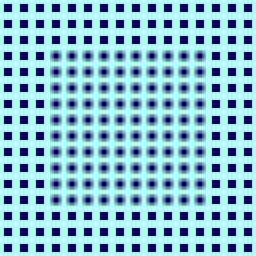

In [331]:
pat = Image.open('raw_rect.png')
bh, bw = 100, 100
pat = pat.resize((bh, bw))
pat = pat.crop((5,5,bh-5,bw-5))
bh, bw = 16, 16
pat = pat.resize((bh, bw))
ill = illusion(pat)
ill.save('illusion_image/blur/5.png')
ill

In [317]:
def illusion(pat): 
    bh, bw = 16, 16
    pat = pat.resize((bh, bw))
    h, w = 256, 256
    uni = Image.new('RGB', (h,w))
    for i in range(0, w, bw):
        for j in range(0, h, bh):
            uni.paste(pat, (i, j))
    box = (50, 50, h-50, w-50)
    blur = uni.filter(ImageFilter.BLUR)
    blur = blur.crop(box)
    uni.paste(blur, box)
    return uni

In [348]:
def uniform(pat):
    bh, bw = 16, 16
    pat = pat.resize((bh, bw))
    h, w = 256, 256
    uni = Image.new('RGB', (h,w))
    for i in range(0, w, bw):
        for j in range(0, h, bh):
            uni.paste(pat, (i, j))
    return uni

In [349]:
%%capture
shapes = [ig.Rectangle(), ig.RawRectangle(), ig.Ring(), ig.Disk(), ig.Arc(), ig.Wedge(), ig.Sigmoid(), ig.Spiral(), ig.ArcCentered(), ig.Asterisk()]
c = 0
for shape in shapes: 
    for i in np.arange(-0.5, 0.6, 0.1):
        for j in np.arange(-0.5, 0.6, 0.1):
            shape.x = i
            shape.y = j

            c += 1
            hv.save(shape[:], 'illusion_image/blur/uniform/{}.png'.format(c))
            pat = Image.open('illusion_image/blur/uniform/{}.png'.format(c))
            uni = uniform(pat)
            uni.resize((28,28))
            uni.save('illusion_image/blur/uniform/{}.png'.format(c))
            ill_0 = illusion(pat)
            ill_0 = ill_0.resize((28,28))
            ill_0.save('illusion_image/blur/blurred/{}.png'.format(c))

            c += 1
            pat = pat.crop((1,1,15,15))
            uni = uniform(pat)
            uni.resize((28,28))
            uni.save('illusion_image/blur/uniform/{}.png'.format(c))
            ill_1 = illusion(pat)
            ill_1 = ill_1.resize((28,28))
            ill_1.save('illusion_image/blur/blurred/{}.png'.format(c))

ia param namespace 
